In [2]:
import numpy as np
import matplotlib.pyplot as plt

Using the indexes to and the Abbé numbers to design an achromatic lens.
Let's start with the indexes

The index for fused silica glass goes by the funciton:

$n^2 - 1 = \frac{0.6961663\lambda^2}{\lambda^2−0.0684043^2} + \frac{0.4079426\lambda^2}{\lambda^2-0.1162414^2} + \frac{0.8974794\lambda^2}{\lambda^2-9.896161^2}$

In [3]:
def n(x):
    n_temp = np.sqrt(1 + 0.6961663*x**2/(x**2 - 0.0684043**2) + 0.4079426*x**2/(x**2 - 0.1162414**2) + 0.8974794*x**2/(x**2 - 9.896161**2))
    return n_temp

def dn(x):
    dn_temp = 0.5*(2*0.6961663*x/(x**2 - 0.0684043**2) - 2*0.6961663*x**3/(x**2 - 0.0684043**2)**2 + 2*0.4079426*x/(x**2 - 0.1162414**2) - 2*0.4079426*x**3/(x**2 - 0.1162414**2)**2 + 2*0.8974794*x/(x**2 - 9.896161**2) - 2*0.8974794*x**3/(x**2 - 9.896161**2)**2)/n(x)
    return dn_temp



In [4]:
print(n(0.530))
print(n(530))

1.4607994580422927
1.7325995904554323


In [5]:
lambd = np.linspace(0 , 5 , 1000)
n_lambda = n(lambd)


C:\Users\augus\AppData\Local\Temp\ipykernel_61764\4149955776.py:2: RuntimeWarning: invalid value encountered in sqrt
  n_temp = np.sqrt(1 + 0.6961663*x**2/(x**2 - 0.0684043**2) + 0.4079426*x**2/(x**2 - 0.1162414**2) + 0.8974794*x**2/(x**2 - 9.896161**2))


In [6]:
print(np.average(0.6961663*lambd**2/(lambd**2 - 0.0684043**2)))
print(np.average(lambd))

0.7043490326836481
2.4999999999999996


Text(0.5, 1.0, 'Refractive index of fused silica')

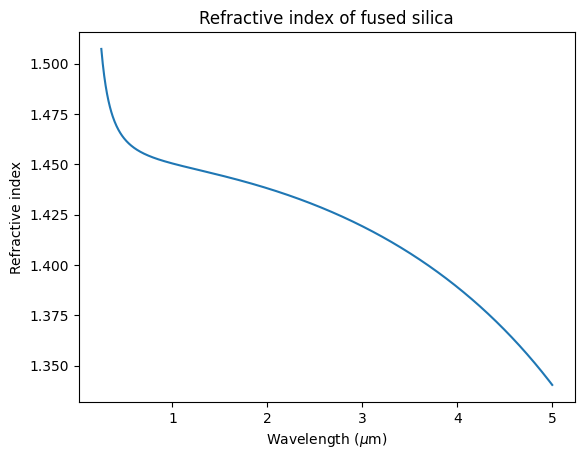

In [7]:
# Plotting the index
sp = 50

plt.plot(lambd[sp:],n(lambd[sp:]))
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Refractive index')
plt.title('Refractive index of fused silica')

# print(f'Refractive index at n[2500]{n[200]}')

That did not look very interesting, now to look at the Abbé numbers. For the refractive lens the Abbé number is defined as:
$V_r = \frac{n_d - 1}{n_f - n_c}$

And the Abbé number for the diffractive lens element has been derived to be:
$V_d = \frac{\lambda_d}{\lambda_f - \lambda_c}$

And the wavelengths are defined to be $\lambda_f < \lambda_d < \lambda_c$.
A notable detail to add is that the refractive element's Abbé number will always be positive whilst the Abbé number for the diffractive element will be negative.

We say that our $\lambda_c = 590$ nm and $\lambda_f = 532$ nm and we select $\lambda_d = \frac{\lambda_c + \lambda_f}{2}$ as the point right between them:

In [8]:
lambd_c = 590e-3  # in microns, this confused me for a bit.
lambd_f = 532e-3
lambd_d = (lambd_c + lambd_f)/2
print(f'$\lambda_c = {lambd_c*1e3}$ nm')
print(f'$\lambda_f = {lambd_f*1e3}$ nm')
print(f'$\lambda_d = {lambd_d*1e3}$ nm')
#print(np.where(lambd == lambd_c))
#n_c = n[np.where(lambd == lambd_c)]
#print(n_c)
n_c = n(lambd_c)
n_f = n(lambd_f)
n_d = n(lambd_d)

print(f'n_c = {n_c}')
print(f'n_f = {n_f}')
print(f'n_d = {n_d}')

$\lambda_c = 590.0$ nm
$\lambda_f = 532.0$ nm
$\lambda_d = 561.0$ nm
n_c = 1.4583783000362256
n_f = 1.4607063448921334
n_d = 1.459459512433466


In [9]:
V_r = (n_d-1)/(n_f-n_c)
print(f'V_r = {V_r}')
V_d = (lambd_d)/(lambd_f-lambd_c)
print(f'V_d = {V_d}')

V_r = 197.35853081503933
V_d = -9.672413793103457


Let's set a desired focal length of the collective lens elements to be $F = 10$ cm

In [10]:
F = 10e-2

The refractive and the diffractive lens elements will have the individual lens elements of:

$f_r = F\cdot(\frac{V_r - V_d}{V_r})$

$f_d = F\cdot(\frac{V_d - V_r}{V_d})$

In [11]:
f_r = F*(V_r - V_d)/V_r
f_d = F*(V_d - V_r)/V_d

print(f'f_r = {f_r}')
print(f'f_d = {f_d}')

f_r = 0.10490093524366995
f_d = 2.140426878301653


Now that we know the individual lens element focal depths, we would like to start designing the geometrical parameters for the lens elements, starting with the refractive lens, as it is most regular. We will find the radius of curvature from the Lens makers formula, under the assumption of the background material to be air:

$ \frac{1}{f} = (n - 1)\frac{1}{R_1} \Rightarrow R_1 = f_r (n - 1)$

In [12]:
R_1 = f_r*(n_d - 1)
# print(f'R_1 = {round(R_1*100,rounding)} cm')

Now we see that the radius of curvature is again dependent on the wavelength, so we would like to see how much this varies in our range of wavelengths.

In [13]:
# print(f'R1 can be between {round(f_r*(n_f - 1)*100,rounding)} cm and {round(f_r*(n_c - 1)*100,rounding)} cm')

For the diffractive element we have a Fresnel lens, which has some parameters.
First we will need to calculate the amount of fresnel zones which is given by:

$M = \frac{R}{\lambda} (\sqrt{1+4F^2}-2F)$

And it is assumed that F is the focal length of the fresnel lens, and so $F=f_r$, and R is the radius of the Fresnel lens.
I have no idea yet what we are going to want the radius of the lens to be, but it seems to be a free variable. We could choose it based on a desired numerical apperture as there is also the relation:

$M = \frac{R}{2\lambda} NA \Rightarrow NA = M \frac{2\lambda}{R}$ or $R = 2\lambda \frac{M}{NA}$

Let's look at an NA value of, idk, let's say 200???
Well anyways, we are also limited by our fabrication capabilities as the smallest zone necessay (I think?) is:

$\Lambda_{min} = \frac{\lambda}{NA}$

In [14]:
na = 200
lambd_min = lambd_d*1e-6 / na
print(f'lambda_min = {lambd_min*1e9} nm')

lambda_min = 2.8049999999999993 nm


Let's just say we have nowhere near that kind of resolution. But moving on. Let's choose a radius of 0.5cm I guess. A more realistic size could be something like 

$\lambda_{\mathrm{min}} = 600nm$

In [15]:
lambd_min = 600e-9
na = lambd_d*1e-6 / lambd_min
print(f'And so the numerical aperture would be {na}')
R = 0.5e-2
M = int(R/2/lambd_d/1e-6 * na)
print(f'M = {M}')

And so the numerical aperture would be 0.9349999999999998
M = 4166


Honestly, it's still about 4 times greater than that of the human eye, that is said to have a NA of 0.23, according to this site:$\\$
https://www.globalspec.com/reference/15062/160210/chapter-10-2-1-resolution-limits-of-conventional-imaging-systems

I suppose we now have all the values that would define our lens elements. But we should probably go back and choose our NA based on the resolution we are capable of making our fresnel lens at.

As a last note I would like to point out that we can determine the positions of our fresnel zones based on the formula:

$f = \frac{r_m^2 - (m\lambda)^2}{2m\lambda}$

And so the zones would be at the positions:

$r_m = \sqrt{2fm\lambda + (m\lambda)^2}$

Of course with $m \in \mathbf N$

Now we look for the method where the thin lens formula differentiated from lambda gives 0, as to indicate 0 change in the wavelength.

$\frac{\partial}{\partial\lambda} \frac{1}{f(\lambda)} = \frac{\partial n(\lambda)}{\partial \lambda} \frac{1}{R_1} + \frac{1}{\Lambda_{\mathrm{min}}R} = 0$

$\Downarrow$

$\frac{R_1}{\Lambda_{\mathrm{min}}R} = -\frac{\partial n(\lambda)}{\partial \lambda}$

Text(0.5, 1.0, 'dn')

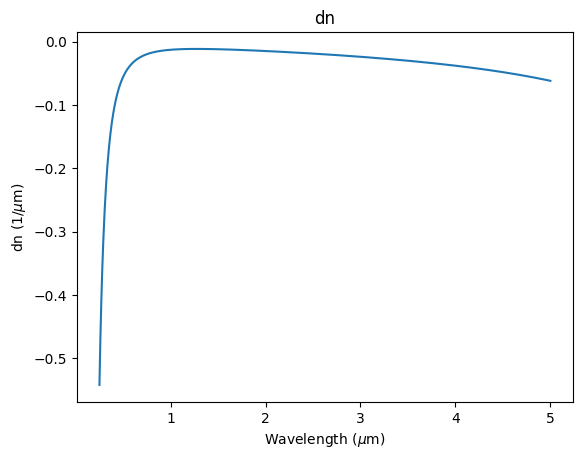

In [16]:
plt.plot(lambd[sp:],dn(lambd[sp:]))
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('dn (1/$\mu$m)')
plt.title('dn')

Let's keep with the minimum possible zone size of $\Lambda_{\mathrm{min}} = 600nm$.$\\$
dn is in units of $\mathrm{[\mu m^{-1}]}$ and so the value of dn should be multiplied with 1e6.

In [17]:
R_1new = -R*lambd_min*dn(lambd_d)*1e6
print(f'Using this method the radius of curvature for the refractive element is {round(R_1new*100,3)} cm')
print(f'R = {R}')
print(dn(lambd_d))

Using this method the radius of curvature for the refractive element is 0.012 cm
R = 0.005
-0.03992501132462282


$R_1 = -\frac{\partial n(\lambda)}{\partial \lambda}\Lambda_{\mathrm{min}}R$


In [18]:
# print(f'There was also a supposed case where we set R1 = 10R which gives a value for the min zone to be {round(-10/(dn(lambd_d)*1e6)*1e6,rounding)} um')
print(dn(lambd_d)*1e-3)

-3.992501132462282e-05


Although I still haven't derived the equations for also using the desired focal length of the achromatic lens as a variable in the calculations for design considerations.$\\$
Besides that, we should also compare the results we get from this method with the results we get from the previous method.

Streamlining of code

In [19]:
extra_round = 2
def Vr(f,d,c):
    nf = n(f)
    nd = n(d)
    nc = n(c)
    Vr_temp = (nd - 1)/(nf - nc)
    return Vr_temp

def Vd(f,d,c):
    Vd_temp = (d)/(f - c)
    return Vd_temp

def fr(Vr,Vd,F):
    fr_temp = F*(Vr - Vd)/Vr
    return fr_temp

def fd(Vr,Vd,F):
    fd_temp = F*(Vd - Vr)/Vd
    return fd_temp

def R1(fr,nd):
    R1_temp = fr*(nd - 1)
    return R1_temp

# def lamda_min(d,na):


def lambda_min(R, d, f):
    '''Takes the units for the wavelength d in microns'''
    M_temp = M(R, d, f)
    lambda_min_temp = d*(f+M_temp*d)/R
    # lamda_min_temp = d*1e-6 / na
    return lambda_min_temp

# def M(R,d,na):


def M(R, d, f):
    '''Takes the units for the wavelength d in microns and f and R in meters'''
    # M_temp = R/(d*1e-6) * (1-(1-na**2)**0.5)/na
    M_temp = (np.sqrt(R**2 + f**2) - f)/d
    return M_temp

def na(R,F):
    na_temp = R/F
    return na_temp

def fr_calc(lam,R1):
    fr_temp = 1/((n(lam) - 1)/R1)
    # print(f'fr = {fr_temp}')
    return fr_temp

def fd_calc(lam,M,R,lam_min):
    # f_temp = (R**2 - (M*lam*1e-6)**2)/(2*M*lam*1e-6)
    f_temp = R*lam_min/(lam*1e-6) - M*lam*1e-6
    # print(f'fd = {f_temp}')
    # print(lam*1e-6)
    return f_temp

def f_total(fd,fr):
    f_temp = 1/(1/fd + 1/fr)
    # print(f'f_total = {f_temp}')
    return f_temp

def achromat_test(f,c,d,R,R1_temp,na_temp,showvals:bool=True):
    # Setting up the values of middle wavelength
    M_temp = M(R1_temp,d,na_temp)
    lamda_min_temp = lamda_min(d,na_temp)
    Fd = R/na_temp
    

    frd = fr_calc(d,R1_temp)
    fdd = 1/(1/Fd - 1/frd)
    
    na_d = na(R,fdd)
    lamda_min_temp = lamda_min(d,na_d)
    M_temp = M(R,d,na_d)

    frc = fr_calc(c,R1_temp)
    fdc = fd_calc(c,M_temp,R1_temp,lamda_min_temp)
    Fc = f_total(frc,fdc)

    frf = fr_calc(f,R1_temp)
    fdf = fd_calc(f,M_temp,R1_temp,lamda_min_temp)
    Ff = f_total(frf,fdf)

    chromatic_aberration = Fc - Ff
    
    
    if showvals:
        print(f'Intended focal length = {Fd*1000} mm')
        print(f'The diffractive element will have a focal length of {fdd*1000} mm')
        print(f'The chromatic aberration of the focal length is {chromatic_aberration*1e3} mm')
        print(f'The fractional error of the chromatic aberration is {chromatic_aberration/Fd*100}%')
        
    return chromatic_aberration



def print_all(f,d,c,F,R:float=1e-3,rounding:int=2,showvals:bool=True):
    Vr_temp = Vr(f,d,c)
    Vd_temp = Vd(f,d,c)
    fr_temp = fr(Vr_temp,Vd_temp,F)
    fd_temp = fd(Vr_temp,Vd_temp,F)
    R1_temp = R1(fr_temp,n(d))
    na_temp = na(R,fd_temp)
    lamda_min_temp = lamda_min(d,na_temp)
    M_temp = M(R,d,na_temp)
    
    frc_temp = fr_calc(c,R1_temp)
    fdc_temp = fd_calc(c,M_temp,R,lamda_min_temp)
    fc_total_temp = f_total(frc_temp,fdc_temp)

    frf_temp = fr_calc(f,R1_temp)
    fdf_temp = fd_calc(f,M_temp,R,lamda_min_temp)
    ff_total_temp = f_total(frf_temp,fdf_temp)
    chromatic_aberration = fc_total_temp - ff_total_temp

    
    # # Supposed radius:
    # print(f'The supposed radius of the fresnel lens is {np.sqrt(2*M_temp*d*fd_temp + (M_temp*d)**2)}')


    if showvals:
        # Printing a bunch of the values
        print(f'Lens radius = {R*1000} mm')
        print(f'Lens focal length = {F*1000} mm')
        print(f'NA of lens = {na(R,F)}')
        print(f'Vr = {round(Vr_temp,rounding)}')
        print(f'Vd = {round(Vd_temp,rounding)}')
        print(f'fr = {round(fr_temp*100,rounding)} cm')
        print(f'fd = {round(fd_temp*100,rounding)} cm')
        print(f'R1 = {round(R1_temp*1e3,rounding)} mm')
        print(f'lambda_min = {round(lamda_min_temp*1e6,rounding)} um')
        print(f'M = {round(M_temp,rounding)}')


        # Looking into the chromatic aberration
        print(f'f for lambda = {c*1e3} nm gives {round(fc_total_temp*100,rounding)} cm')
        print(f'f for lambda = {f*1e3} nm gives {round(ff_total_temp*100,rounding)} cm')
        print(f'The chromatic aberration of the focal length is {round(chromatic_aberration*1e9,rounding*extra_round)} nm')
        print(f'The fractional error of the chromatic aberration is {round(chromatic_aberration/F*100,rounding*extra_round)}%')
        if True:
            # Comparing with the chromatic aberration of the refractive lens element.
            # print(f'fr for lambda = {c*1e3} nm gives {round(frc_temp*100,rounding)} cm')
            # print(f'fd for lambda = {f*1e3} nm gives {round(frf_temp*100,rounding)} cm')
            print(f'The chromatic aberration of the focal length for the refractive element is {round((frc_temp-frf_temp)*1e3,rounding*extra_round)} mm or {round((frc_temp-frf_temp)/fr_temp*100,rounding)}%')
            reduction = abs(chromatic_aberration/(frc_temp-frf_temp)*100)
            print(f'The diffractive element reduced the chromatic aberration to {round(reduction,rounding*extra_round)}% of the original value')
        if R1_temp < R:
            print(f'R1 is less than the lens radius, this is not possible')
        else:
            proportion = R1_temp/R
            print(f'R1 is {round(proportion,rounding)} times the lens radius')
            theta_temp = np.arcsin(R/R1_temp)
            print(f'Theta = {round(theta_temp,rounding)} and the sin(theta) = {round(np.sin(theta_temp),rounding)}')
            print(f'The error proportion of the approximation is {round(theta_temp/np.sin(theta_temp),rounding)}')

In [20]:
# # For the first case with f = 5mm
print_all(f=lambd_f,d=lambd_d,c=lambd_c,F=5e-3,rounding=3)

Lens radius = 1.0 mm
Lens focal length = 5.0 mm
NA of lens = 0.2
Vr = 197.359
Vd = -9.672
fr = 0.525 cm
fd = 10.702 cm
R1 = 2.41 mm
lambda_min = 60.039 um
M = 8.328
f for lambda = 590.0 nm gives 0.5 cm
f for lambda = 532.0 nm gives 0.5 cm
The chromatic aberration of the focal length is -3.164915 nm
The fractional error of the chromatic aberration is -6.3e-05%
The chromatic aberration of the focal length for the refractive element is 0.026567 mm or 0.507%
The diffractive element reduced the chromatic aberration to 0.011913% of the original value
R1 is 2.41 times the lens radius
Theta = 0.428 and the sin(theta) = 0.415
The error proportion of the approximation is 1.031


In [21]:
# For the second case with f = 2mm
print_all(lambd_f,lambd_d,lambd_c,2e-3,R = 5e-4)

Lens radius = 0.5 mm
Lens focal length = 2.0 mm
NA of lens = 0.25
Vr = 197.36
Vd = -9.67
fr = 0.21 cm
fd = 4.28 cm
R1 = 0.96 mm
lambda_min = 48.03 um
M = 5.21
f for lambda = 590.0 nm gives 0.2 cm
f for lambda = 532.0 nm gives 0.2 cm
The chromatic aberration of the focal length is -1.9782 nm
The fractional error of the chromatic aberration is -0.0001%
The chromatic aberration of the focal length for the refractive element is 0.0106 mm or 0.51%
The diffractive element reduced the chromatic aberration to 0.0186% of the original value
R1 is 1.93 times the lens radius
Theta = 0.55 and the sin(theta) = 0.52
The error proportion of the approximation is 1.05


In [22]:
# For the third case with f = 1.2mm
print_all(lambd_f,lambd_d,lambd_c,1.2e-3,R = 3e-4)

Lens radius = 0.3 mm
Lens focal length = 1.2 mm
NA of lens = 0.25
Vr = 197.36
Vd = -9.67
fr = 0.13 cm
fd = 2.57 cm
R1 = 0.58 mm
lambda_min = 48.03 um
M = 3.12
f for lambda = 590.0 nm gives 0.12 cm
f for lambda = 532.0 nm gives 0.12 cm
The chromatic aberration of the focal length is -1.1869 nm
The fractional error of the chromatic aberration is -0.0001%
The chromatic aberration of the focal length for the refractive element is 0.0064 mm or 0.51%
The diffractive element reduced the chromatic aberration to 0.0186% of the original value
R1 is 1.93 times the lens radius
Theta = 0.55 and the sin(theta) = 0.52
The error proportion of the approximation is 1.05


In [23]:
#Verification check

print_all(lambd_f,lambd_d,lambd_c,F,R)

Lens radius = 5.0 mm
Lens focal length = 100.0 mm
NA of lens = 0.049999999999999996
Vr = 197.36
Vd = -9.67
fr = 10.49 cm
fd = 214.04 cm
R1 = 48.2 mm
lambda_min = 240.16 um
M = 10.41
f for lambda = 590.0 nm gives 10.0 cm
f for lambda = 532.0 nm gives 10.0 cm
The chromatic aberration of the focal length is -3.9558 nm
The fractional error of the chromatic aberration is -0.0%
The chromatic aberration of the focal length for the refractive element is 0.5313 mm or 0.51%
The diffractive element reduced the chromatic aberration to 0.0007% of the original value
R1 is 9.64 times the lens radius
Theta = 0.1 and the sin(theta) = 0.1
The error proportion of the approximation is 1.0


1. Maximise the NA with a Lens with the focal length of 1mm.
2. The difference in the focal length over the spectre off our desired wavelengths may be at most 1um.
3. Try to move some of the optical power from the refractive element over to the diffractive element, at the cost of chromatic abberation.
4. How large will the chromatic abberation be, if we choose the NA to be 0.8 with the focal length of 1mm?

In [24]:
R_val = np.linspace(1e-3,5e-3,100)
f1 = 1e-3
Vr1 = Vr(lambd_f,lambd_d,lambd_c)
Vd1 = Vd(lambd_f,lambd_d,lambd_c)
NA_val = na(R_val,f1)
fr_val = fr(Vr1,Vd1,f1)
R1_val = R1(fr_val,n(lambd_d))
print(f'R1 = {R1_val*1000} mm')
NA_max = na(R1_val,f1)
print(f'NA_max = {NA_max}')

# plt.plot(R_vals*1000,NA_vals)
# plt.xlabel('Lens radius (mm)')
# plt.ylabel('NA')
# plt.title('NA vs Lens radius for f = 1mm in achromatic lens')

# plt.plot(R_vals*1000,R1_vals*1000)
# plt.xlabel('Lens radius (mm)')
# plt.ylabel('R1 (mm)')
# plt.title('R1 vs Lens radius for f = 1mm in achromatic lens')


R1 = 0.48197732560871176 mm
NA_max = 0.48197732560871176


In [25]:
f1 = 1e-3
NA1 = 0.8
R_t = f1*NA1
print(f'R = {R_t*1000} mm')
R1_t = R_t*1
achromat_test(lambd_f,lambd_d,lambd_c,R_t,R1_t,NA1)



R = 0.8 mm
Intended focal length = 1.0 mm
The diffractive element will have a focal length of 2.341771614873505 mm
The chromatic aberration of the focal length is -0.02334841033287973 mm
The fractional error of the chromatic aberration is -2.3348410332879728%


-2.334841033287973e-05

Text(0.5, 1.0, 'Chromatic aberration vs R1 for f = 1mm and NA = 0.8 in achromatic lens')

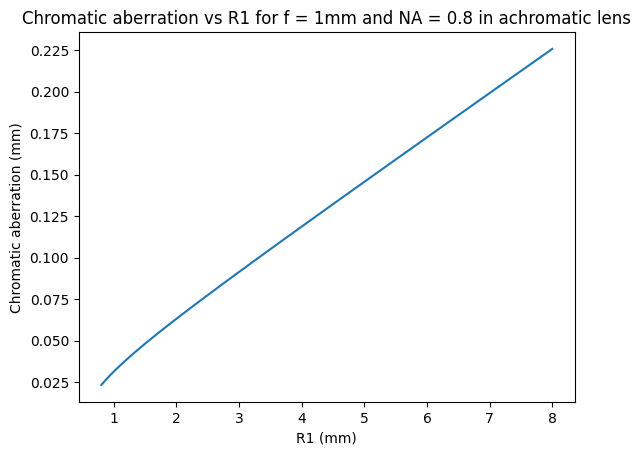

In [26]:
R1_vals = np.linspace(R_t,10*R_t,100)
Chromatic_abs = achromat_test(lambd_f,lambd_d,lambd_c,R_t,R1_vals,NA1,showvals=False)

plt.plot(R1_vals*1000,abs(Chromatic_abs*1e3))
plt.xlabel('R1 (mm)')
plt.ylabel('Chromatic aberration (mm)')
plt.title('Chromatic aberration vs R1 for f = 1mm and NA = 0.8 in achromatic lens')

Let's look for how much the NA can become, if we limit ourselves to a chromatic aberration of at most 1um and stay with a focal length of 1mm with a R1 of 5R

The value of R1 is 0.6241241241241242 mm
The value of the radius of the lens is 0.12482482482482483 mm
The theoretical value of R at the lowest Chromatic aberration is 0.096 mm
The value of the NA is 0.12482482482482483
minimum chr ab = 0.027um
For the NA = 0.5 the chromatic aberration is 68.524um
For the NA = 0.8 the chromatic aberration is 117.945um


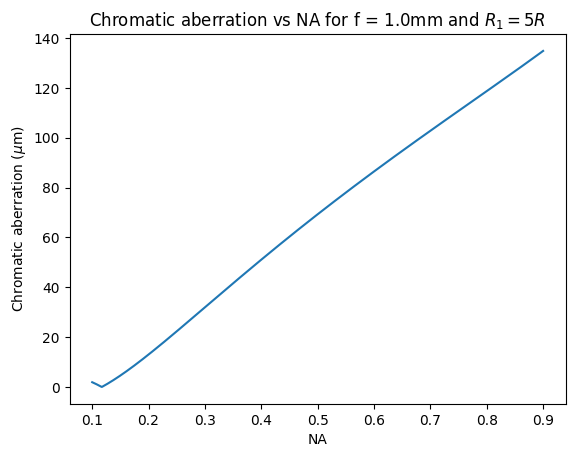

In [36]:
NA_vals = np.linspace(0.1,0.9,1000)
f1 = 1e-3
R_vals = f1*NA_vals
R1_vals = R_vals*5
Chromatic_abs = achromat_test(lambd_f,lambd_d,lambd_c,R_vals,R1_vals,NA_vals,showvals=False)
Vr_temp = Vr(lambd_f,lambd_d,lambd_c)
Vd_temp = Vd(lambd_f,lambd_d,lambd_c)
plt.plot(NA_vals,abs(Chromatic_abs*1e6))
plt.xlabel('NA')
# plt.xlabel('Lens radius (mm)')
plt.ylabel('Chromatic aberration ($\mu$m)')
plt.title(f'Chromatic aberration vs NA for f = {round(f1*1e3,1)}mm and $R_1 = 5R$')
# plt.ylim(0,1)
# plt.xlim(0.1,0.14)


#Find the value of R1 with Chromatic aberration of 1um
for i in range(len(Chromatic_abs)):
    if abs(Chromatic_abs[-i])*1e6 < 1:
        print(f'The value of R1 is {R1_vals[-i]*1000} mm')
        print(f'The value of the radius of the lens is {R_vals[-i]*1000} mm')
        print(f'The theoretical value of R at the lowest Chromatic aberration is {round(1/5*1e3*R1(fr(Vr_temp,Vd_temp,1e-3),n_d),3)} mm')
        print(f'The value of the NA is {NA_vals[-i]}')
        break
print(f'minimum chr ab = {round(min(abs(Chromatic_abs))*1e6,3)}um')

for i in range(len(NA_vals)):
    if a == 0:
        a = (round(NA_vals[i],2)==0.5)*round(Chromatic_abs[i]*1e6,3)
    if b == 0:
        b = (round(NA_vals[i],2)==0.8)*round(Chromatic_abs[i]*1e6,3)

print(f'For the NA = 0.5 the chromatic aberration is {abs(a)}um')
print(f'For the NA = 0.8 the chromatic aberration is {abs(b)}um')

Let's try with a more lenient value for R1 of 3R

The value of R1 is 0.5594594594594594 mm
The value of the radius of the lens is 0.1864864864864865 mm
The value of the NA is 0.1864864864864865
minimum chr ab = 0.037um


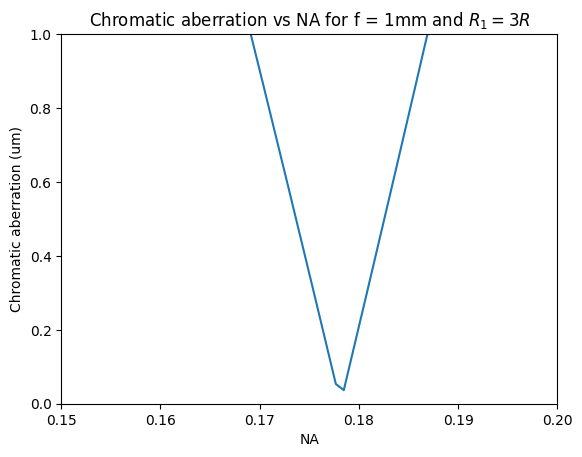

In [28]:
R1_vals = R_vals*3
Chromatic_abs = achromat_test(lambd_f,lambd_d,lambd_c,R_vals,R1_vals,NA_vals,showvals=False)

plt.plot(NA_vals,abs(Chromatic_abs*1e6))
plt.xlabel('NA')
plt.ylabel('Chromatic aberration (um)')
plt.title('Chromatic aberration vs NA for f = 1mm and $R_1 = 3R$')
plt.ylim(0,1)
plt.xlim(0.15,0.2)

#Find the value of R1 with Chromatic aberration of 1um
for i in range(len(Chromatic_abs)):
    if abs(Chromatic_abs[-i])*1e6 < 1:
        print(f'The value of R1 is {R1_vals[-i]*1000} mm')
        print(f'The value of the radius of the lens is {R_vals[-i]*1000} mm')
        print(f'The value of the NA is {NA_vals[-i]}')
        break
print(f'minimum chr ab = {round(min(abs(Chromatic_abs))*1e6,3)}um')

And the most extreme case, where nothing should in practice work anymore for R1=R

The value of R1 is 0.49319319319319327 mm
The value of the radius of the lens is 0.49319319319319327 mm
The value of the NA is 0.4931931931931932
minimum chr ab = 0.014um


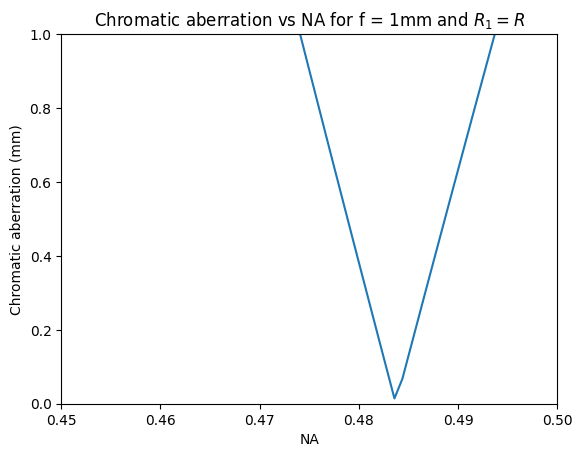

In [29]:
R1_vals = R_vals*1
Chromatic_abs = achromat_test(lambd_f,lambd_d,lambd_c,R_vals,R1_vals,NA_vals,showvals=False)

plt.plot(NA_vals,abs(Chromatic_abs*1e6))
plt.xlabel('NA')
plt.ylabel('Chromatic aberration (mm)')
plt.title('Chromatic aberration vs NA for f = 1mm and $R_1 = R$')
plt.ylim(0,1)
plt.xlim(0.45,0.5)
#Find the value of R1 with Chromatic aberration of 1um
for i in range(len(Chromatic_abs)):
    if abs(Chromatic_abs[-i])*1e6 < 1:
        print(f'The value of R1 is {R1_vals[-i]*1000} mm')
        print(f'The value of the radius of the lens is {R_vals[-i]*1000} mm')
        print(f'The value of the NA is {NA_vals[-i]}')
        break
print(f'minimum chr ab = {round(min(abs(Chromatic_abs))*1e6,3)}um')

Looking into the possibility of placing the lenses in series, so to combine multiple achromat lens elements.

In [30]:
class lens():
    '''Class for keeping track of the properties of a lens'''

    def __init__(self, f, R, achromat=True, lambd_f=lambd_f, lambd_d=lambd_d, lambd_c=lambd_c):
        '''Takes the focal length and radius of the lens in meters.
        The lens will be made from the theory of achromatic lens design unless achromat is set to False'''
        # Setting the properties of the lens
        self.f = f
        self.R = R
        self.na = na(R, f)
        # The values for the 3 wavelengths are required to calculate the Abbé numbers.
        # By default the values have been set as defined in the top of the document
        self.Vr = Vr(lambd_f, lambd_d, lambd_c)
        self.Vd = Vd(lambd_f, lambd_d, lambd_c)

        # If the lens is an achromat, the properties of the lens will be calculated using the achromatic lens design theory
        if achromat:
            self.fr = fr(self.Vr, self.Vd, self.f)
            self.R1 = R1(self.fr, n(lambd_d))
            self.fd = fd(self.Vr, self.Vd, self.f)
            # self.nad = na(self.R,self.fd)
            self.lamda_min = lambda_min(R=self.R, d=lambd_d, f=self.fd)
            self.M = M(R=self.R, d=lambd_d, f=self.fd)
        # If the lens is not set as an achromat, the parameters will be set from the basis that the radius of curvature for the refractive lens element
        # is 5 times the radius of the lens, so to keep to the thin lens approximation
        else:
            self.R1 = 5*R
            self.fr = fr_calc(lambd_d, self.R1)
            self.fd = 1/(1/f - 1/self.fr)
            # self.nad = na(self.R,self.fd)
            self.lamda_min = lambda_min(R=self.R, d=lambd_d, f=self.fd)
            self.M = M(R=self.R, d=lambd_d, f=self.fd)

    def print_vals(self):
        print(f'f = {self.f*1000} mm')
        print(f'R = {self.R*1000} mm')
        print(f'Vr = {self.Vr}')
        print(f'Vd = {self.Vd}')
        print(f'R1 = {self.R1*1000} mm')
        print(f'NA = {self.na}')
        print(f'fr = {self.fr*100} cm')
        print(f'fd = {self.fd*100} cm')
        # print(f'NA_d = {self.nad}')
        print(f'lambda_min = {self.lamda_min*1e6} um')
        print(f'M = {self.M}')

    def chromatic_focals(self, lambd_c=lambd_c, lambd_f=lambd_f):
        '''Returns the focal lengths at the two wavelengths'''
        frc = fr_calc(lambd_c, self.R1)
        fdc = fd_calc(lambd_c, self.M, self.R1, self.lamda_min)
        fc_total = f_total(frc, fdc)

        frf = fr_calc(lambd_f, self.R1)
        fdf = fd_calc(lambd_f, self.M, self.R1, self.lamda_min)
        ff_total = f_total(frf, fdf)

        return fc_total, ff_total

    def chromatic_aberration(self):
        '''Returns the chromatic aberration of the lens focal lengths at the lens' specified wavelengths'''
        fc_total, ff_total = self.chromatic_focals

        chromatic_aberration = fc_total - ff_total
        return chromatic_aberration
    


In [31]:
lens1 = lens(f=3e-3,R=1e-3)
lens1.print_vals()

fc,ff = lens1.chromatic_focals()
chr_ab = lens1.chromatic_aberration()
print(f'Chromatic aberration = {chr_ab*1e3} mm')
# Percentage of the focal length
print(f'Fractional error = {chr_ab/lens1.f*100}%')

# For 2 lens elements
f2 = 1/(1/lens1.f + 1/lens1.f)
fc2 = 1/(1/fc + 1/fc)
ff2 = 1/(1/ff + 1/ff)
chr_ab2 = fc2 - ff2
print(f'Chromatic aberration for 2 lens elements = {chr_ab2*1e3} mm')
# Percentage of the focal length
print(f'Fractional error for 2 lens elements = {chr_ab2/f2*100}%')
print(f'New focal length = {f2*1000} mm')
print(f'new NA = {na(lens1.R,f2)}, old NA = {lens1.na}')


f = 3.0 mm
R = 1.0 mm
Vr = 197.35853081503933
Vd = -9.672413793103457
R1 = 1.4459319768261354 mm
NA = 0.3333333333333333
fr = 0.31470280573100984 cm
fd = 6.421280634904958 cm
NA_d = 0.015573217506865765
lambda_min = 36.0233843618168 um
M = 13.880714657243153
Chromatic aberration = 0.004596359236279553 mm
Fractional error = 0.15321197454265176%
Chromatic aberration for 2 lens elements = 0.0022981796181397764 mm
Fractional error for 2 lens elements = 0.15321197454265176%
New focal length = 1.5 mm
new NA = 0.6666666666666666, old NA = 0.3333333333333333


In [32]:
#sin(theta)*5*R = R
print(np.arcsin(1/5))
print(np.arcsin(1/5)*5-1)
print(np.tan(1/5))
print(np.tan(1/5)*5-1)
print(f'The width of the lens is about 1/{round(1/(5-5*np.cos(np.arcsin(1/5))),3)} the radius of the lens')

0.2013579207903308
0.006789603951653955
0.2027100355086725
0.01355017754336263
The width of the lens is about 1/9.899 the radius of the lens


In [33]:
a = 2
b = 3

print(5*(a<b) + 10*(a>=b))

5
